In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import os
from setting import DROP_FEATURES
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('survey_results_public.csv' , index_col='ResponseId')
pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 100)
df = df.drop(DROP_FEATURES, axis=1)
country_grp = df.groupby(['Country'])
America = country_grp.get_group('United States of America').copy()
America = America.drop('Country', axis=1)
America

# employment = df['Employment'].value_counts()
# employment

/var/folders/_y/yj2br66n1s11j40c681dw54w0000gn/T/ipykernel_40377/276463001.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  America = country_grp.get_group('United States of America').copy()


,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,CompTotal,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,EmbeddedHaveWorkedWith,OpSysPersonal use,OpSysProfessional use,AISearchDevHaveWorkedWith,AISelect,AIBen,AIAcc,AIToolCurrently Using,AIThreat,AIEthics,AIChallenges,ICorPM,WorkExp,Frustration,Industry,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",10,NaN,Student,NaN,NaN,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Cloud Firestore,Cloudflare,Node.js,Rasberry Pi,iOS;MacOS;Ubuntu,NaN,ChatGPT;GitHub Copilot;OpenAI Codex,Yes,Increase productivity;Greater efficiency;Impro...,Somewhat trust,Writing code;Debugging and getting help,No,Circulating misinformation or disinformation;M...,NaN,NaN,NaN,NaN,NaN,NaN
7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",7,7,Academic researcher,NaN,NaN,R,NaN,NaN,NaN,NaN,MacOS,MacOS,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,20,NaN,Project manager,NaN,NaN,JavaScript;Python;Ruby,Elasticsearch;MongoDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Google Cloud,Node.js;React;Ruby on Rails,NaN,Windows;Windows Subsystem for Linux (WSL),Windows,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;V...,Yes,Increase productivity;Speed up learning;Improv...,Somewhat distrust,Learning about a codebase;Writing code;Documen...,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,Individual contributor,15.0,Amount of technical debt;Number of software to...,Healthcare,8.0
13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,20,12,"Developer, back-end",NaN,NaN,Bash/Shell (all shells);C#;JavaScript;PowerShe...,MySQL,Amazon Web Services (AWS);Google Cloud;Hetzner...,NaN,NaN,Windows;Windows Subsystem for Linux (WSL),Windows Subsystem for Linux (WSL),NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,Individual contributor,12.0,Amount of technical debt;Complexity of tech st...,Software Development,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65257,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Bootstrapping a business;Professional developm...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,30,7,Other (please specify):,2 to 9 employees,NaN,C;C++;Python;Swift;TypeScript,InfluxDB;MariaDB;MongoDB;MySQL;SQLite,Amazon Web Services (AWS),Angular;Express;Flask,LLVM's Clang,MacOS;Ubuntu,MacOS;Ubuntu,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;P...,Yes,Increase productivity;Speed up learning,Somewhat distrust,Writing code;Search for answers,No,Missing or incorrect attribution for sources o...,Don’t trust the output or answers,NaN,NaN,NaN,NaN,NaN
65262,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hob


Feature Statistics (Standardized Data):
                              Mean  Standard Deviation
CompTotal           -5.045035e-19            1.000071
WorkExp             -7.060041e-17            1.000089
JobSatPoints_1      -3.701408e-17            1.000090
JobSatPoints_4      -4.208168e-17            1.000090
JobSatPoints_5       1.210573e-17            1.000090
JobSatPoints_6       5.093496e-18            1.000090
JobSatPoints_7       7.954311e-17            1.000090
JobSatPoints_8       6.171440e-17            1.000090
JobSatPoints_9       4.327145e-17            1.000090
JobSatPoints_10      6.362310e-18            1.000090
JobSatPoints_11     -5.091671e-18            1.000090
ConvertedCompYearly -6.076910e-18            1.000107
JobSat               1.540750e-17            1.000090


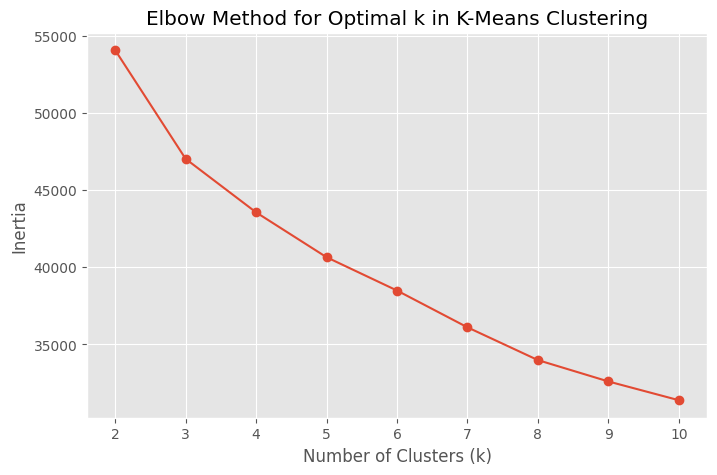


Top Singular Values:
 0    156.244958
1     84.081677
2     81.016579
3     71.108365
4     69.518290
5     65.783067
6     61.726340
7     60.645336
8     57.162295
9     54.047769
Name: Singular Values, dtype: float64

Highly Correlated Features (|corr| > 0.8):
 Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


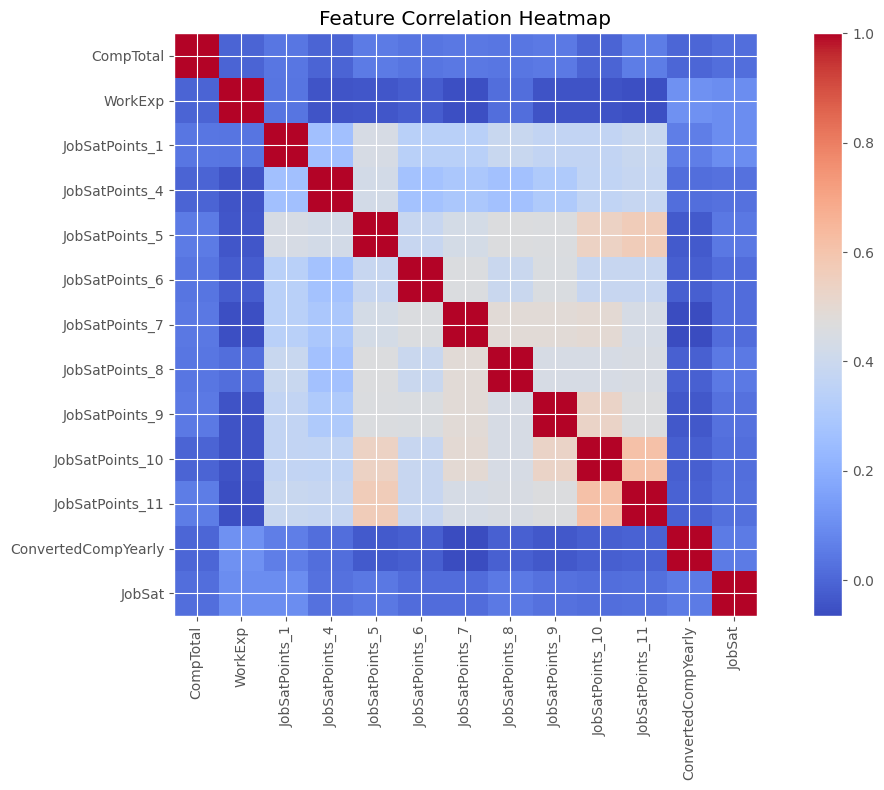

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from scipy.linalg import svd

# Load the dataset
file_path = "survey_results_public.csv"  # Update path if needed
df = pd.read_csv(file_path, index_col="ResponseId")

# Filter for United States data
country_grp = df.groupby("Country")
if "United States of America" in country_grp.groups:
    America = country_grp.get_group("United States of America").copy()
    America = America.drop(columns=["Country"])  # Drop redundant column
else:
    raise ValueError("United States data not found in dataset.")

# Select only numeric features
America_numeric = America.select_dtypes(include=["number"]).dropna(axis=1, how="all")

# Standardize the dataset
scaler = StandardScaler()
America_standardized = pd.DataFrame(scaler.fit_transform(America_numeric), columns=America_numeric.columns)

# Compute mean and standard deviation
feature_stats = pd.DataFrame({
    "Mean": America_standardized.mean(),
    "Standard Deviation": America_standardized.std()
})
print("\nFeature Statistics (Standardized Data):\n", feature_stats)

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy="mean")
America_standardized_imputed = pd.DataFrame(imputer.fit_transform(America_standardized),
                                            columns=America_standardized.columns)

# Perform K-Means Clustering with different k values
inertia = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(America_standardized_imputed)
    inertia.append(kmeans.inertia_)

# Plot elbow method to determine optimal k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k in K-Means Clustering")
plt.show()

# Apply SVD
U, S, Vt = svd(America_standardized_imputed)
singular_values = pd.Series(S, name="Singular Values")

# Display top singular values
print("\nTop Singular Values:\n", singular_values.head(10))

# Compute correlation matrix
correlation_matrix = America_standardized_imputed.corr()

# Identify highly correlated features (absolute correlation > 0.8, excluding diagonal)
highly_correlated_features = correlation_matrix.where(
    np.triu(np.abs(correlation_matrix) > 0.8, k=1)
).stack().reset_index()
highly_correlated_features.columns = ["Feature 1", "Feature 2", "Correlation"]

print("\nHighly Correlated Features (|corr| > 0.8):\n", highly_correlated_features)

# Plot heatmap of correlation matrix using matplotlib only
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.index)), labels=correlation_matrix.index)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()
